# "Selective Mask"
> "How to select certain aspects of a mask for viewing and for loading into a `DataBlock`"
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [medical_imaging, prostate, kaggle, segmentation]
- image: images/msk.PNG

## Goal:

The goals of this notebook are to:
- look through how to select specify masks for an image
- based on the dataset from this competition: [Prostate cANcer graDe Assessment (PANDA) Challenge](https://www.kaggle.com/c/prostate-cancer-grade-assessment) and you can view my kaggle [kernel](https://www.kaggle.com/avirdee/fastai2-selective-mask-map-isup-grades)

This notebook does not use `DICOMS`

## Motivation

There more than 1 million new prostate cancer diagnoses reported every year, in fact prostate cancer is the second most common cancer among males worldwide that results in more than 350,000 deaths annually. Diagnosis of prostate cancer is based on the grading of prostate tissue biopsies. These tissue samples are examined by a pathologist and scored according to the Gleason grading system.

The grading process consists of finding and classifying cancer tissue into so-called Gleason patterns (3, 4, or 5) based on the architectural growth patterns of the tumor

![glee.PNG](my_icons/glee.PNG)
(picture: courtesy: Kaggle)

After the biopsy is assigned a Gleason score, it is converted into an ISUP grade on a 1-5 scale

## Dataset

The dataset consists of about 10,600 images and masks

In [2]:
#hide
#Load the dependancies
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

import seaborn as sns
import numpy as np
import pandas as pd
import os
import cv2

sns.set(style="whitegrid")
sns.set_context("paper")

matplotlib.rcParams['image.cmap'] = 'ocean_r'

In [5]:
#hide
source = Path("D:/Datasets/prostate_png")
files = os.listdir(source)
train = source/'train_images'
mask = source/'train_label_masks'
train_labels = pd.read_csv(source/'train.csv')

In [18]:
#hide
def view_image(folder, fn):
    if folder == train:
        filename = f'{folder}/{fn}.png'
    if folder == mask:
        filename = f'{folder}/{fn}_mask.png'
    file = Image.open(filename)
    t = tensor(file)
    if folder == train:
        show_image(t)
    if folder == mask:
        show_image(t[:,:,2])

Lets view an image

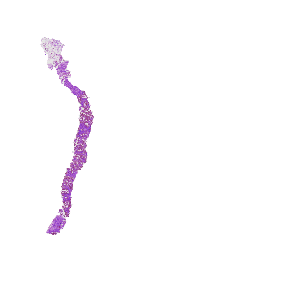

In [19]:
view_image(train, '0005f7aaab2800f6170c399693a96917')

And the corresponding mask

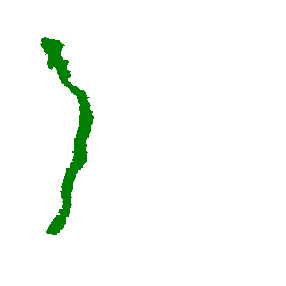

In [20]:
view_image(mask, '0005f7aaab2800f6170c399693a96917')